### The Sparks Foundation Data Science and Business Analytics Internship
### Task 1:Linear regression model for predicting scores of students
##### Author: Gowri S

In this execise we  will be using the python  code to predict the student score by taking the hours they study per day as input using the machine learning technique  called simple linear regression .I will be describing the process in different steps.


### Step-1: Importing the libraries
Here I have launched the jupiter notebook and have imported some of the necessary libraries for data analysis and visualization. 

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step-2: Load the data
we will be loading the data to dataframe format.Lets have a look at datatype and the nature of the given data set.we will be analysing the structure of dataframe .These analysis will help us identify and eliminate outliers,unwanted features etc

In [33]:
student_score=pd.read_csv(r"D:\datas\sparks internship\students_score.csv")
student_score

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [34]:
student_score.shape

(25, 2)

In [35]:
student_score.dtypes

Hours     float64
Scores      int64
dtype: object

In [36]:
student_score['Scores']=student_score['Scores'].astype(np.float64)

In [37]:
student_score.dtypes

Hours     float64
Scores    float64
dtype: object

In [38]:
student_score.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [39]:
student_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     float64
dtypes: float64(2)
memory usage: 528.0 bytes


### Step-3 Visualization
Here we are verifiying our decision to create linear model for prediction.So at first we need to now whether the distribution is in  agreement for linear model.

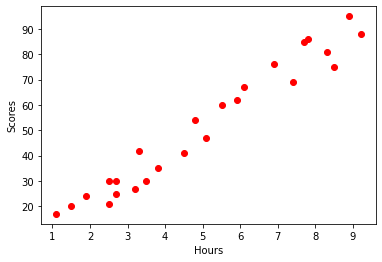

In [40]:
plt.scatter(student_score.Hours,student_score.Scores,color='red')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### What will be predicted score if a student studies for 9.25 hrs/ day? 

### Step-4 Model Building and Training the data set
As the first set we need to create import the most essential libraries for linear modelling.We will be using scikitlearn library for this.After creating linear regression object,it will be trained using the given set for further prediction.I think here it will not be necessary for us to split given data into test and train data,since it is a linear modelling and the data set is small.Then we will be analysing the accuracy of our prediction.

In [41]:
from sklearn.linear_model import LinearRegression
score_model=LinearRegression()

In [42]:
score_model.fit(student_score[['Hours']],student_score[['Scores']])

LinearRegression()

In [22]:
score_model.predict([[9.25]])

array([[92.90985477]])

### Step-5 Model  Evaluation

In [43]:
score_model.score(student_score[['Hours']],student_score['Scores'])

0.9529481969048356

The score value indicate that our model has an accuracy of around 95% and it will be well and good.So while training the model, what actually happening is that the model try to find the best set of slope and intercept for the given training data.we can find those slope and intercept for the given data set as:

In [44]:
score_model.coef_

array([[9.77580339]])

In [25]:
score_model.intercept_

array([2.48367341])

In [26]:
y=9.77580339*9.25+2.48367341
print(y)

92.9098547675


In [27]:
score_model.predict(student_score[['Hours']])

array([[26.92318188],
       [52.3402707 ],
       [33.76624426],
       [85.57800223],
       [36.69898527],
       [17.14737849],
       [92.4210646 ],
       [56.25059205],
       [83.62284155],
       [28.87834256],
       [77.75735951],
       [60.16091341],
       [46.47478866],
       [34.74382459],
       [13.23705714],
       [89.48832358],
       [26.92318188],
       [21.05769985],
       [62.11607409],
       [74.8246185 ],
       [28.87834256],
       [49.40752968],
       [39.63172629],
       [69.9367168 ],
       [78.73493985]])

In [28]:
student_score['Predicted Scores']=score_model.predict(student_score[['Hours']])
student_score

,Hours,Scores,Predicted Scores
0,2.5,21.0,26.923182
1,5.1,47.0,52.340271
2,3.2,27.0,33.766244
3,8.5,75.0,85.578002
4,3.5,30.0,36.698985
5,1.5,20.0,17.147378
6,9.2,88.0,92.421065
7,5.5,60.0,56.250592
8,8.3,81.0,83.622842
9,2.7,25.0,28.878343


Now lets see how the prediction going to look like or how well the fit

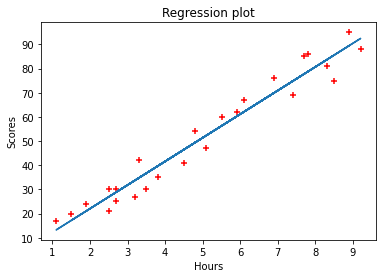

In [31]:
plt.scatter(student_score[['Hours']],student_score[['Scores']],color='r',marker='+')
plt.plot(student_score[['Hours']],score_model.predict(student_score[['Hours']]).astype(float))
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title("Regression plot")
plt.show()